### Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan_application.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

### Exploratory Data Analysis

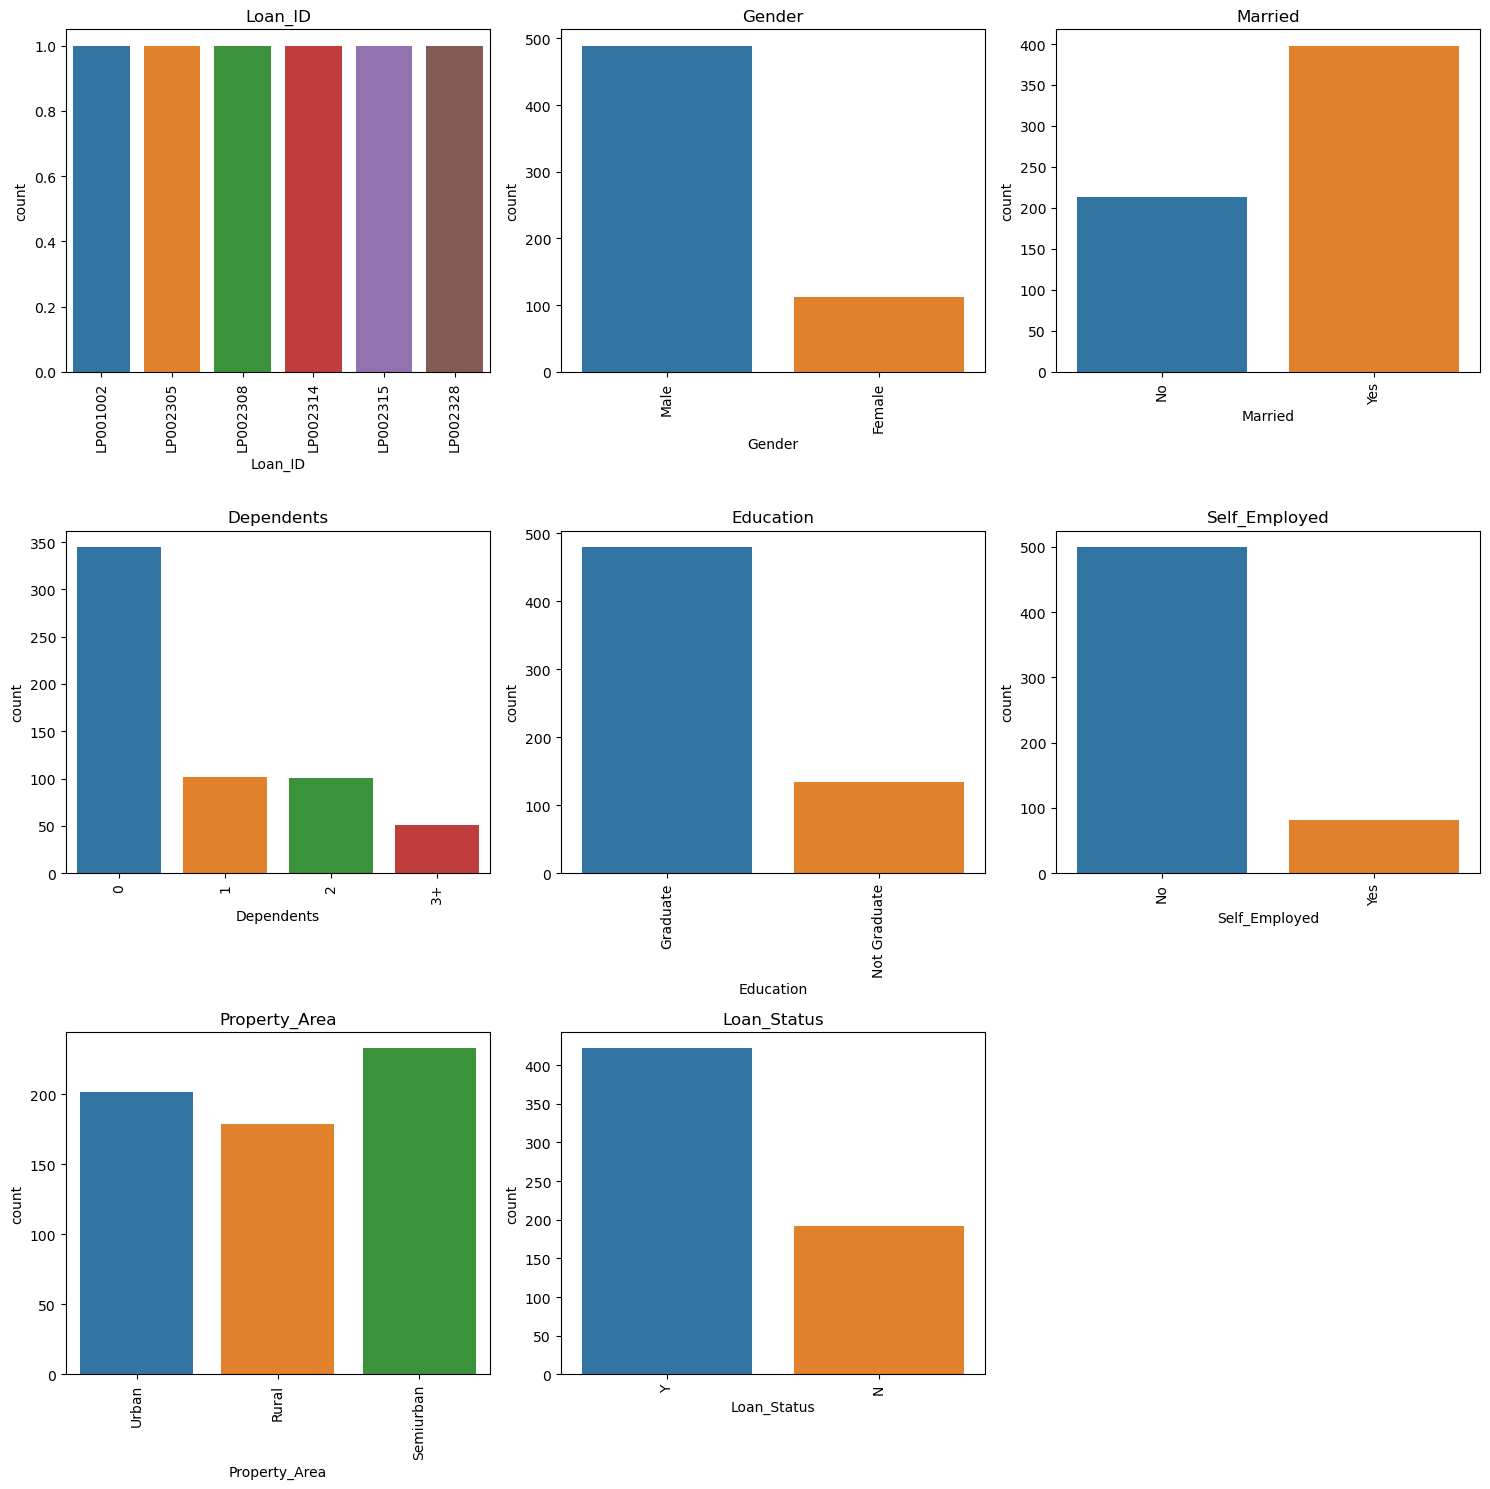

In [5]:
# Find all the columns with categorical data and store in a list

categoricals = df.select_dtypes(include = 'object').columns.tolist()

#create a figure with subplots
num_cols = len(categoricals)
num_rows = (num_cols + 2) // 3         # determine the number of plots per row
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 *  num_rows))
axs = axs.flatten()

#create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(categoricals):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)


#Remove extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])


#Adjust the spacing between subplots
fig.tight_layout()

#Show plot
plt.show()


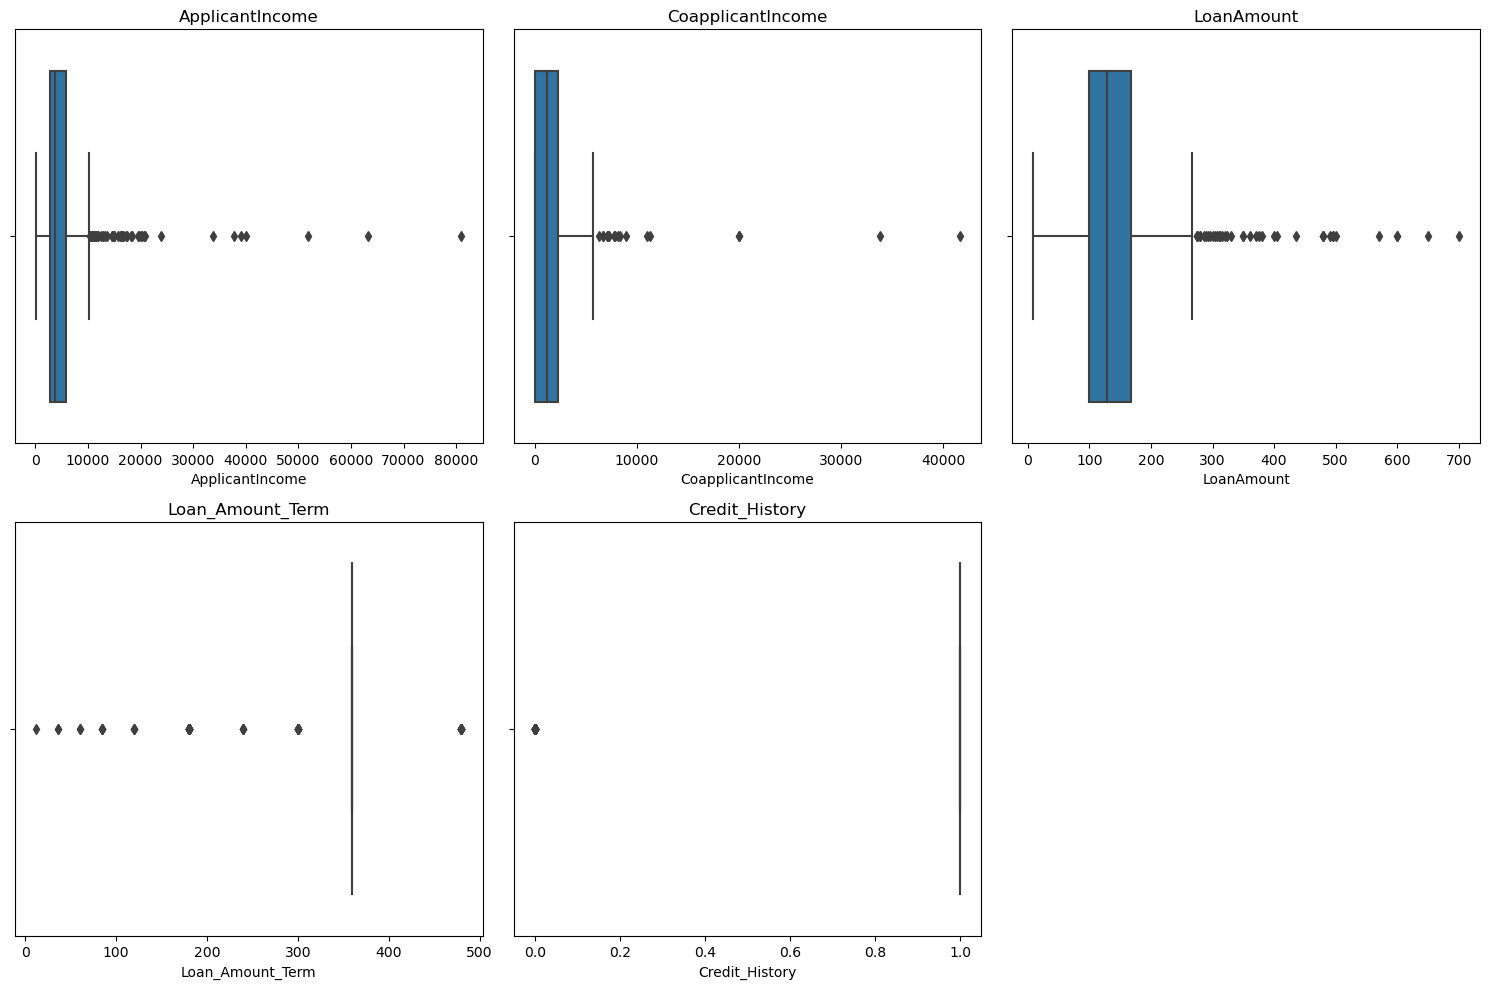

In [6]:
#Get all the columns with numerical data

numericals = df.select_dtypes(include = ['int', 'float']).columns.tolist()

#create a figure with subplots
num_cols = len(numericals)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 *  num_rows))
axs = axs.flatten()

for i, var in enumerate(numericals):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

#Remove extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])


#Adjust the spacing between subplots
fig.tight_layout()

#Show plot
plt.show()

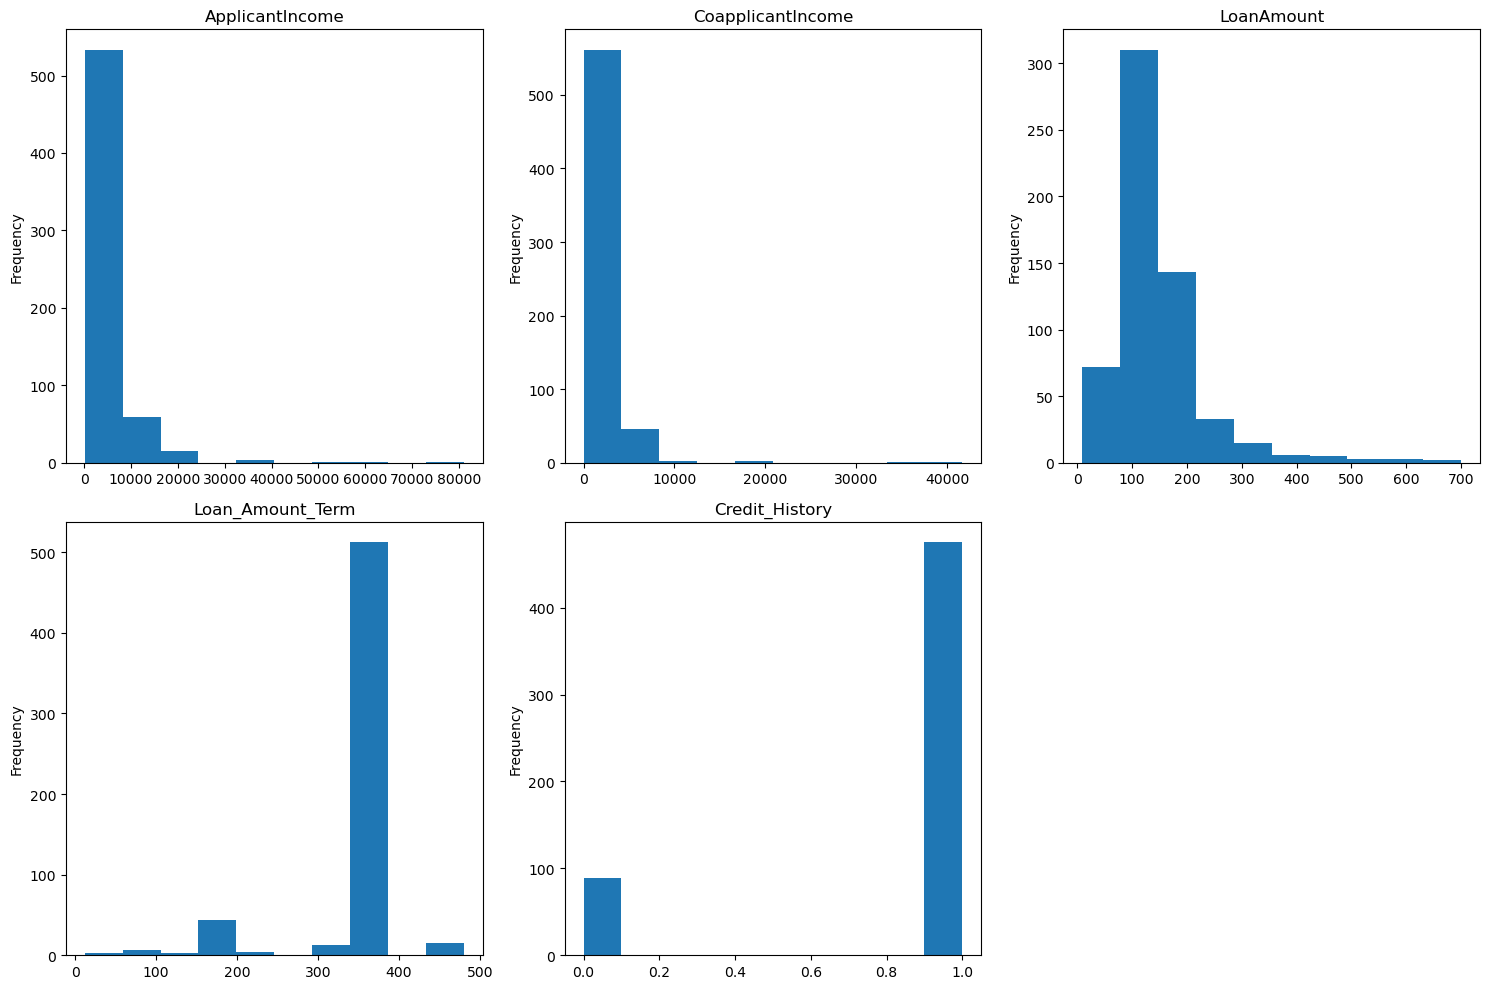

In [7]:
#Get all the columns with numerical data

numericals = df.select_dtypes(include = ['int', 'float']).columns.tolist()

#create a figure with subplots
num_cols = len(numericals)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 *  num_rows))
axs = axs.flatten()

for i, var in enumerate(numericals):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

#Remove extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])


#Adjust the spacing between subplots
fig.tight_layout()

#Show plot
plt.show()

### Feature Engineering and Data Cleaning

In [8]:
missing_values = df.isna().sum()
print(missing_values)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
#check for the proportion of missing data values in each column
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending = False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [10]:
# preview the data types for each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
#find the average of the loan amounts and fill that into the missing values of the column
loan_amount_average = df['LoanAmount'].mean().round(2)
df['LoanAmount'].fillna(loan_amount_average, inplace=True)

In [12]:
#find the average of the loan amounts terms and fill that into the missing values
loan_term_average = df['Loan_Amount_Term'].mean().round(2)

df['Loan_Amount_Term'].fillna(loan_term_average, inplace=True)

In [13]:
#Check for credit history values
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [14]:
#Handles missing credit history data
df['Credit_History'].fillna(df['Credit_History'].mean().round(2), inplace=True)

In [15]:
# check to see that all numeric data types are non null
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Dropped because this variable does not influence the target variable
# hence it is not useful for the machine learning model.
df.drop(columns = 'Loan_ID', inplace=True)

In [17]:
# Transform the categorical variables into machine language format

from sklearn import preprocessing

# Loop over each column in the Dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:           # returns a list of all the columns of type object

    #Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    #Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    #Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    #Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()} ")
    


Gender: [1 0 2] 
Married: [0 1 2] 
Dependents: [0 1 2 3 4] 
Education: [0 1] 
Self_Employed: [0 1 2] 
Property_Area: [2 0 1] 
Loan_Status: [1 0] 


<Axes: >

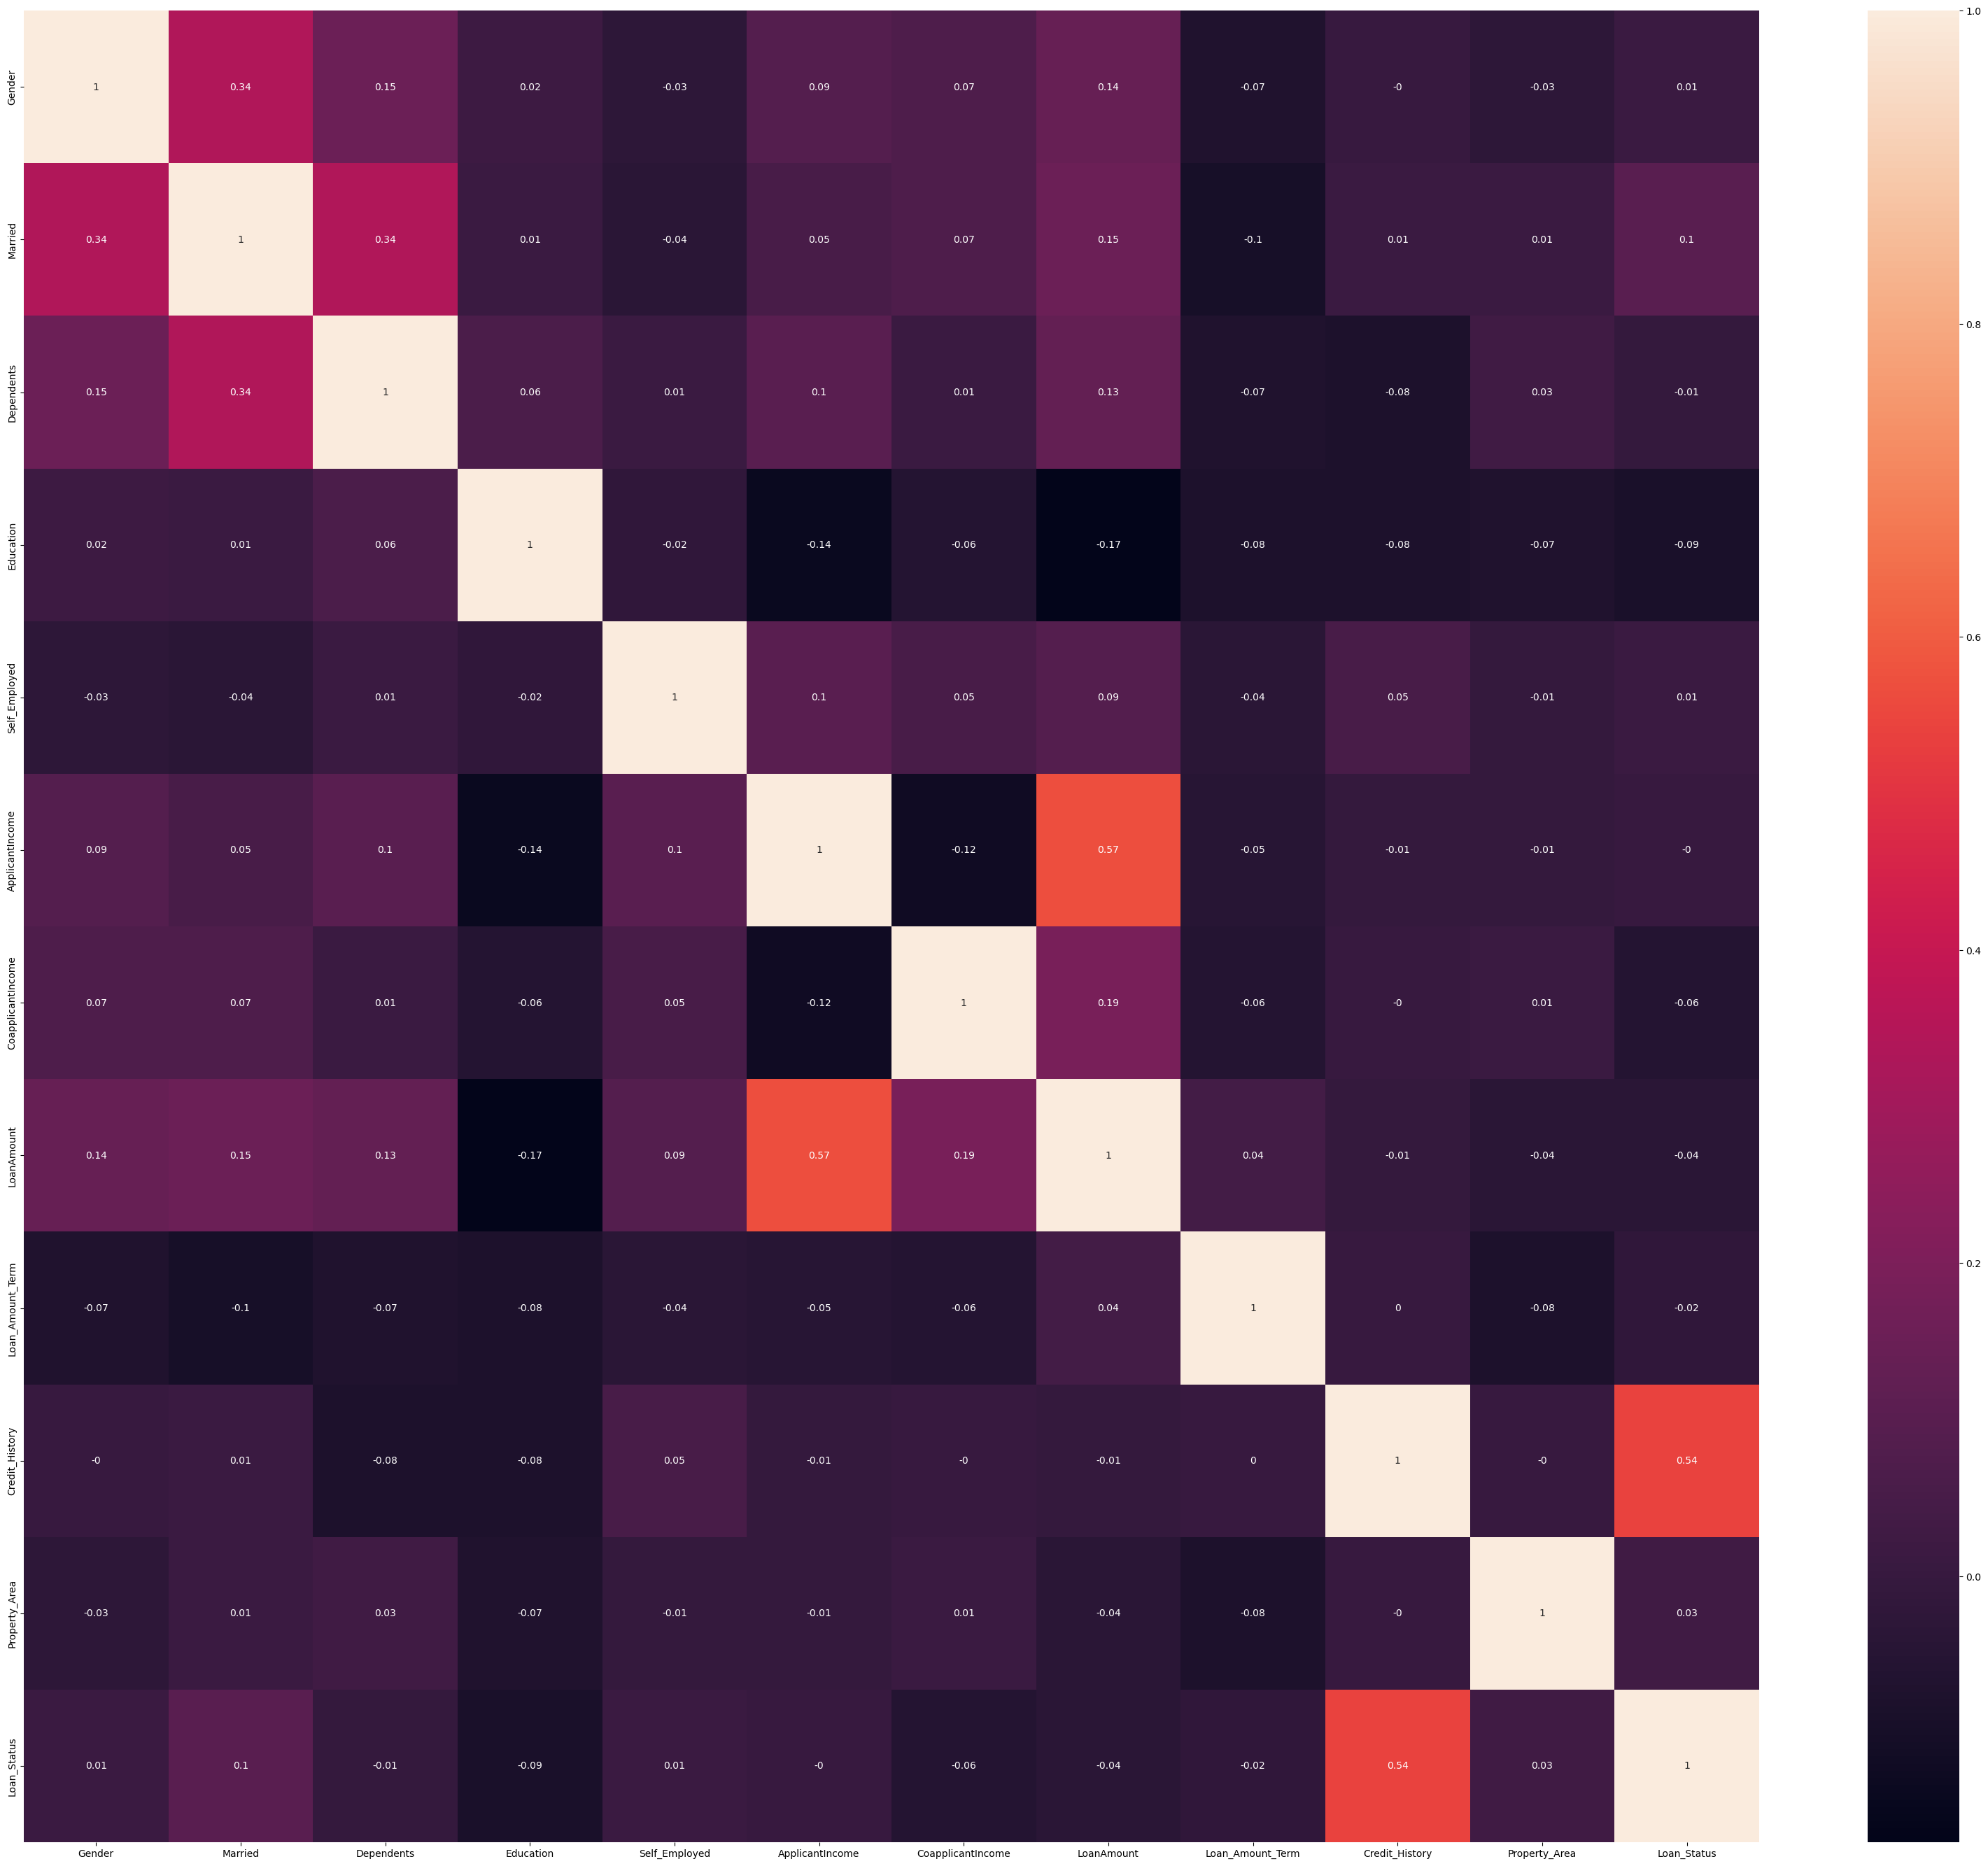

In [18]:
# Check for multicolinearity using a correlation Analysis

# Create a correlation heatmap 
plt.figure(figsize = (40,34))
sns.heatmap(df.corr().round(2), fmt= '.2g', annot = True)

## Machine Learning Models

In [19]:
#Seperating the data into X and Y
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [20]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 20% of the dataset would be used for testing 

### Algorithm Selection

In [21]:
#import relevant libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [22]:
#Fixing a random seed for reproducible results
RANDOM_SEED = 30

In [23]:
# defining the classifiers in an array
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED),
    DecisionTreeClassifier(class_weight = 'balanced',random_state=RANDOM_SEED)
    
]

In [24]:
#Iterate over the array of the classifiers and print their evaluation

for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)     # Only the classifier name should be printed along with f1 score

SGDClassifier : 0.10204081632653061
KNeighborsClassifier : 0.7724867724867724
LogisticRegression : 0.8979591836734695
LogisticRegressionCV : 0.8979591836734695
BaggingClassifier : 0.8021978021978022
GaussianNB : 0.8923076923076922
RandomForestClassifier : 0.8704663212435233
ExtraTreesClassifier : 0.8631578947368421
DecisionTreeClassifier : 0.7325581395348836


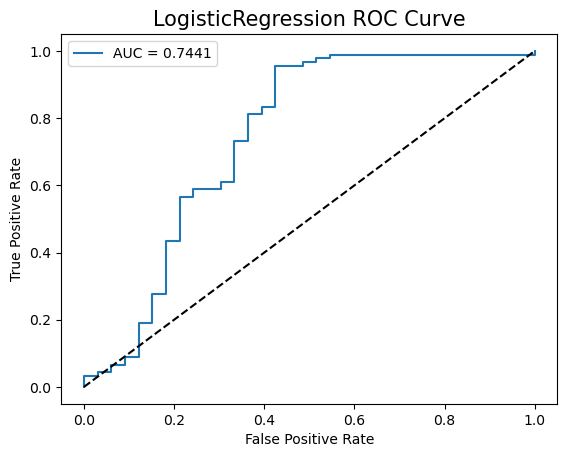

In [32]:
#Further test of the accuracy of the chosen classifier(Classification Model)

LR = LogisticRegression()
LR_fitting = LR.fit(X_train, y=y_train)

y_pred_proba = LR_fitting.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']),
                                 pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index


fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])


plt.plot(fpr, tpr, label = 'AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('LogisticRegression ROC Curve', size = 15)
plt.legend()